# Avaliação 01 - ENGG03

## Questão adaptada de [Galan et al. 2004](https://doi.org/10.1016/j.jprocont.2003.10.003)

Em um reator de neutralização, uma solução ácida (HCl) com vazão volumétrica $F_a = 1$ L/min e concentração inicial $C_{1,\text{in}} = 0.0012$ mol HCl/L é neutralizada por uma solução alcalina (NaOH + NaHCO3) com vazão $F_b = 0.82$ L/min e concentrações iniciais $C_{2,\text{in}} = 0.002$ mol NaOH/L e $C_{3,\text{in}} = 0.0025$ mol NaHCO3/L.
O comportamento dinâmico das concentrações dentro do reator, representado pelas variáveis $x_1$, $x_2$ e $x_3$, pode ser descrito pelo seguinte sistema de equações diferenciais:
\begin{align}
\frac{dx_1}{dt} &= \frac{Fa\cdot(C_{1,\text{in}}-x_1) - Fb\cdot x_1}{V}\\
\frac{dx_2}{dt} &= \frac{Fb\cdot(C_{2,\text{in}}-x_2) - Fa\cdot x_2}{V}\\
\frac{dx_3}{dt} &= \frac{Fb\cdot(C_{3,\text{in}}-x_3) - Fa\cdot x_3}{V}
\end{align}

Além disso, é possível determinar o pH da solução a partir do seguinte sistema de equações algébricas:

\begin{align*}
\text{pH} &= -\log_{10}(\xi) \\
\xi &= x_1 + \frac{K_e}{\xi} + \frac{K_e\cdot x_3}{K_e + K_d\cdot\xi} - x_2 - x_3
\end{align*}
na qual $K_e = 1\times 10^{-14}$ (mol/L)$^2$ e $K_d = 1\times 10^{-7}$ mol/L

A partir das informações dada, pede-se:

1.   No estado estacionário, as concentrações não variam com o tempo. Portanto, calcule os valores das concentrações $x_1$, $x_2$ e $x_3$ e o pH nessas condições.
2.   Assumindo a razão $u = \frac{F_b}{F_a}$, avalie o comportamento do pH para um intervalo de valores de $u$ no intervalo $[0,1]$.

  2.1. Dica: Utilize uma variação mínima de $\Delta u = 0.05$.

  2.2. Dica: Construa um gráfico de pH em função de $u$.

OBS: Comente seu código de maneira clara e objetiva deixando em evidência para que serve/objetivo de cada função, biblioteca e variáveis utilizadas.

## Solução dos problemas
#### Por Silas Henrique Alves Araújo, Ecília Silva de Oliveira e Andreza Ísis Santos Costa.

### Concentrações no estado estacionário:

In [1]:
# fsolve é função da biblioteca SciPy que permite achar a solução de uma função não linear ou de um sistema de equações não lineares.
from scipy.optimize import fsolve

# NumPy é uma biblioteca que fornece suporte para arrays multidimensionais e uma variedade de funções matemáticas úteis.
import numpy as np


def concentrações(u):
    """Calcula as concentrações dos componentes do sistema em função da razão u=Fb/Fa."""

    # Definindo as Constantes
    Fa = 1.0  # L/min (HCl)
    Fb = Fa * u  # L/min (NaOH + NaHCO3)

    C1in = 0.0012  # mol HCl/L
    C2in = 0.002  # mol NaOH/L
    C3in = 0.0025  # mol NaHCO3/L

    # Criando a matriz dos coeficientes
    A = np.array(
        [
            [Fa + Fb, 0, 0],
            [0, Fb + Fa, 0],
            [0, 0, Fb + Fa],
        ]
    )

    # Criando o vetor das constantes
    b = np.array([[Fa * C1in], [Fb * C2in], [Fb * C3in]])

    # Resolvendo o sistema linear
    sol = np.linalg.solve(A, b)

    return [sol[0, 0], sol[1, 0], sol[2, 0]]


# chamando a função concentrações(u) com um valor específico para a razão u, que é 0.82 neste caso.
X = concentrações(0.82)

# Imprimindo os resultados
print("Concentrações no estado estacionário:")
print("- Concentração de HCL:", X[0], "mol/L")
print("- Concentração de NaOH:", X[1], "mol/L")
print("- Concentração de NaHCO3:", X[2], "mol/L")

Concentrações no estado estacionário:
- Concentração de HCL: 0.0006593406593406593 mol/L
- Concentração de NaOH: 0.0009010989010989011 mol/L
- Concentração de NaHCO3: 0.0011263736263736263 mol/L


### pH no estado estacionário:

In [2]:
def pH_equation(pH0, X):
    # Constantes
    x1 = X[0]
    x2 = X[1]
    x3 = X[2]
    Ke = 1e-14  # anteriormente 1e-4 (mol/L)^2
    Kd = 1e-7  # mol/L

    # Csi foi isolado manualmente, para que não seja preciso resolver um sistema de equações e sim apenas uma.
    Csi = 10.0 ** (-pH0)

    return x1 + (Ke / Csi) + ((Ke * x3) / (Ke + Kd * Csi)) - x2 - x3 - Csi


# "Chute" inicial 7, afinal é um tanque neutralizador
Y = fsolve(pH_equation, 7, args=(X,))
print("pH no estado estacionário:", Y)
# Testa a solução. Se ela estiver correta, o valor deve ser muito proximo de zero.
print("Teste da solução do sistema:", pH_equation(Y, X))

pH no estado estacionário: [10.38421557]
Teste da solução do sistema: [-2.48434727e-18]


### Gráfico de pH em função de $u$

Para poder avaliar o comportamento do pH quando razão $u = \frac{F_b}{F_a}$ varia no intervalo $[0,1]$, será necessário colocar toda a lógica anterior dentro de uma função de u, para poder ser chamada varias vezes. E com esses valores desenhar um gráfico utilizando a biblioteca matplotlib.

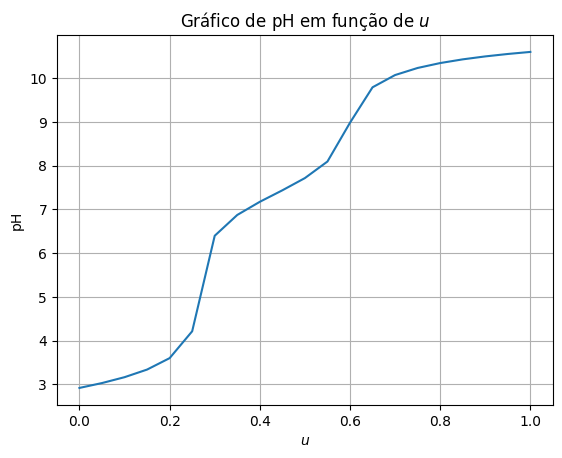

In [3]:
# Matplotlib é uma biblioteca usada para criação de gráficos
import matplotlib.pyplot as plt


def pH(u):
    """Retorna o valor do pH dado um valor de u"""
    X = concentrações(u)
    # "Chute" inicial 3, pois quando u é muito baixo, vai ter muito mais ácido, abaixando o pH.
    # Não foi necessário ajustar o valor do chute para valores de "u" mais altos.
    # Caso fosse necessário, poderíamos fazer o chute aumentar conforme "u"
    # ou utilizar outra estrategia, como o valor do chute ser o valor do pH anterior.
    return fsolve(pH_equation, 3, args=(X,))


# Calcula os pontos
X_gráfico = np.linspace(0, 1, 21)  # Começo, Fim, número de pontos (1/0.05 + 1 = 21)
Y_gráfico = [pH(u) for u in X_gráfico]

# Plota o gráfico
fig, ax = plt.subplots()
ax.plot(X_gráfico, Y_gráfico)
ax.grid()
ax.set(xlabel="$u$", ylabel="pH", title="Gráfico de pH em função de $u$")

plt.show()

Pelo gráfico é possível perceber que quanto maior a vazão da solução alcalina (NaOH + NaHCO3), em comparação com a vazão da solução ácida de HCl, maior o pH da mistura final.